In [1]:
import pandas as pd
import numpy as np

In [2]:
!pip install --quiet optuna
!pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [3]:
df_train_new=pd.read_csv(r'df_train_new.csv')
df_test_new=pd.read_csv(r'df_test_new.csv')

df_train_new.drop(columns=['Unnamed: 0'],inplace=True)
df_test_new.drop(columns=['Unnamed: 0'],inplace=True)

df_train_new

,Datetime,PM2.5,PM10,CO,SO2,O3,AQI,Amaravati,Amritsar,Bengaluru,...,Lucknow,Mumbai,Patna,Seoul,Shillong,Talcher,Thiruvananthapuram,Visakhapatnam,India,Korea
0,0.305176,0.061439,0.098901,0.021882,0.063953,0.634083,138.823529,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.305215,0.066434,0.112138,0.021882,0.070522,0.587896,138.823529,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.305254,0.080920,0.132867,0.021882,0.065097,0.497611,138.823529,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.305293,0.082418,0.134116,0.021882,0.057085,0.563408,139.583333,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.305331,0.076175,0.116883,0.021882,0.050366,0.534292,141.833333,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356785,0.814411,0.026973,0.043956,0.029839,0.005002,0.005281,109.937500,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
356786,0.814450,0.019980,0.032967,0.027850,0.004997,0.005271,108.097222,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
356787,0.814489,0.016983,0.028971,0.025860,0.005002,0.005266,103.965278,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
356788,0.814527,0.016983,0.028971,0.025860,0.004997,0.005276,101.437500,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


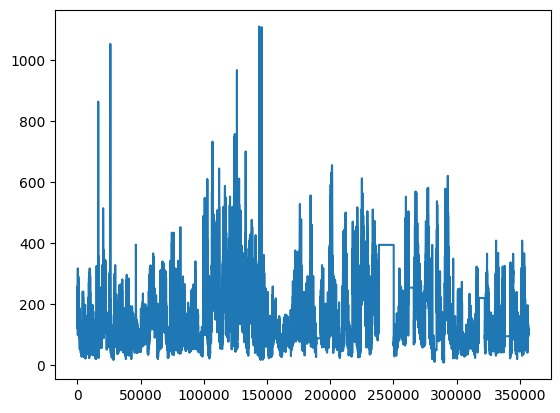

In [4]:
import matplotlib.pyplot as plt
plt.plot(df_train_new['AQI'])

In [5]:
def window_slide(train,label):
  window_size = 24
  X = []
  Y = []
  for i in range(window_size, len(train)):
    X.append(train[i-window_size:i,:])
    Y.append(label[i,:])

  return X,Y

In [6]:
y_train=np.reshape(df_train_new['AQI'],(len(df_train_new),1))
y_test=np.reshape(df_test_new['AQI'],(len(df_test_new),1))

df_train_new.drop(columns=['AQI'],inplace=True)
df_test_new.drop(columns=['AQI'],inplace=True)

print(y_train.shape)
print(y_test.shape)

(356790, 1)
(89203, 1)


In [7]:
df_train_new

,Datetime,PM2.5,PM10,CO,SO2,O3,Amaravati,Amritsar,Bengaluru,Bhopal,...,Lucknow,Mumbai,Patna,Seoul,Shillong,Talcher,Thiruvananthapuram,Visakhapatnam,India,Korea
0,0.305176,0.061439,0.098901,0.021882,0.063953,0.634083,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.305215,0.066434,0.112138,0.021882,0.070522,0.587896,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.305254,0.080920,0.132867,0.021882,0.065097,0.497611,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.305293,0.082418,0.134116,0.021882,0.057085,0.563408,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.305331,0.076175,0.116883,0.021882,0.050366,0.534292,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356785,0.814411,0.026973,0.043956,0.029839,0.005002,0.005281,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
356786,0.814450,0.019980,0.032967,0.027850,0.004997,0.005271,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
356787,0.814489,0.016983,0.028971,0.025860,0.005002,0.005266,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
356788,0.814527,0.016983,0.028971,0.025860,0.004997,0.005276,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [8]:
X_train,y_train=window_slide(df_train_new.values,y_train)
X_train = np.array(X_train)
y_train = np.array(y_train)
print('Y' ,y_train.shape)
print('X' ,X_train.shape)

X_test,y_test=window_slide(df_test_new.values,y_test)
X_test = np.array(X_test)
y_test = np.array(y_test)

X_train_CNN=X_train.reshape((X_train.shape[0],2,12,X_train.shape[2]))
X_test_CNN=X_test.reshape((X_test.shape[0],2,12,X_test.shape[2]))

print('Y' ,y_test.shape)
print('X' ,X_test.shape)

Y (356766, 1)
X (356766, 24, 31)
Y (89179, 1)
X (89179, 24, 31)


In [9]:
X_test_CNN.shape

(89179, 2, 12, 31)

In [10]:
# from keras.models import Sequential
# from keras.layers import LSTM
# from keras.layers import Dense
# from keras.layers import Flatten
# from keras.layers import TimeDistributed
# from keras.layers.convolutional import Conv1D
# from keras.layers.convolutional import MaxPooling1D
# import optuna
# from sklearn.metrics import mean_squared_error
# from keras.layers import GRU
# from keras.layers import SimpleRNN
# import tensorflow as tf

# def objective(trial):

    
#   classifier = trial.suggest_categorical('classifier', ['LSTM', 'RNN','GRU'])
#   batch_size=trial.suggest_int('batch_size',256,512)
#   units=trial.suggest_int('units',64,256)
#   filters=trial.suggest_int('filters',32,64)
    
  
#   if classifier=='LSTM':
#       model = Sequential()
#       model.add(TimeDistributed(Conv1D(filters=filters, kernel_size=1, activation='relu'), input_shape=(None, X_train_CNN.shape[2], X_train_CNN.shape[3])))
#       model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
#       model.add(TimeDistributed(Flatten()))
#       model.add(LSTM(units=units, activation='relu'))
#       model.add(Dense(1))
#       model.compile(optimizer='adam', loss='mse')

#       model.fit(X_train_CNN,y_train,epochs=15,batch_size=batch_size,verbose=1)
#       y_pred=model.predict(X_test_CNN)
#       return mean_squared_error(y_test, y_pred)

#   elif classifier=='RNN':
#       model = Sequential()
#       model.add(SimpleRNN(units=units, input_dim=X_train.shape[-1], input_length=X_train.shape[1],return_sequences=True))
#       model.add(SimpleRNN(units=units-32))
#       model.add(Dense(1))
#       model.compile(optimizer='adam', loss='mse')
#       model.fit(X_train,y_train,epochs=15,batch_size=batch_size,verbose=1)
#       y_pred=model.predict(X_test)
#       return mean_squared_error(y_test, y_pred)
#   else:
#       model = Sequential()
#       model.add(GRU(units=units, return_sequences=True, input_dim=X_train.shape[-1], input_length=X_train.shape[1]))
#       model.add(GRU(units=units))
#       model.add(Dense(1))
#       model.compile(optimizer='adam', loss='mse')
#       model.fit(X_train,y_train,epochs=15,batch_size=batch_size,verbose=1)
#       y_pred=model.predict(X_test) 

#       return mean_squared_error(y_test, y_pred)

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=50)

# trial = study.best_trial

# print('Accuracy: {}'.format(trial.value))
# print("Best hyperparameters: {}".format(trial.params))

In [11]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten, Dropout
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Bidirectional, GRU, SimpleRNN
import tensorflow as tf

model = Sequential()
model.add(TimeDistributed(Conv1D(filters=51, kernel_size=1, activation='relu'), input_shape=(None, X_train_CNN.shape[2], X_train_CNN.shape[3])))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(SimpleRNN(units=128, activation='relu'))
# model.add(SimpleRNN(units=64, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train_CNN,y_train,epochs=30,batch_size=256,verbose=1)

2023-08-04 21:21:01.571981: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-04 21:21:02.017588: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-08-04 21:21:02.468091: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-04 21:21:02.488156: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

Epoch 1/30


2023-08-04 21:21:05.174088: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-08-04 21:21:05.562610: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-08-04 21:21:05.598235: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-08-04 21:21:05.600352: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7fec4401cf60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-08-04 21:21:05.600363: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2023-08-04 21:21:05.603401: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-08-04 21:21:05.65091

1394/1394 [==============================] - 6s 2ms/step - loss: 3455.0540
Epoch 2/30
1394/1394 [==============================] - 3s 2ms/step - loss: 1441.7949
Epoch 3/30
1394/1394 [==============================] - 3s 2ms/step - loss: 1215.8737
Epoch 4/30
1394/1394 [==============================] - 3s 2ms/step - loss: 1140.0192
Epoch 5/30
1394/1394 [==============================] - 3s 2ms/step - loss: 1075.7388
Epoch 6/30
1394/1394 [==============================] - 3s 2ms/step - loss: 1026.3411
Epoch 7/30
1394/1394 [==============================] - 3s 2ms/step - loss: 975.5108
Epoch 8/30
1394/1394 [==============================] - 3s 2ms/step - loss: 948.6667
Epoch 9/30
1394/1394 [==============================] - 3s 2ms/step - loss: 913.7012
Epoch 10/30
1394/1394 [==============================] - 3s 2ms/step - loss: 890.9055
Epoch 11/30
1394/1394 [==============================] - 3s 2ms/step - loss: 872.5300
Epoch 12/30
1394/1394 [==============================] - 3s 2ms/step

In [15]:
y_pred=model.predict(X_test_CNN)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred,squared=True)
mse

2787/2787 [==============================] - 2s 807us/step


2666.660072977218

In [13]:
y_test.shape

(89179, 1)

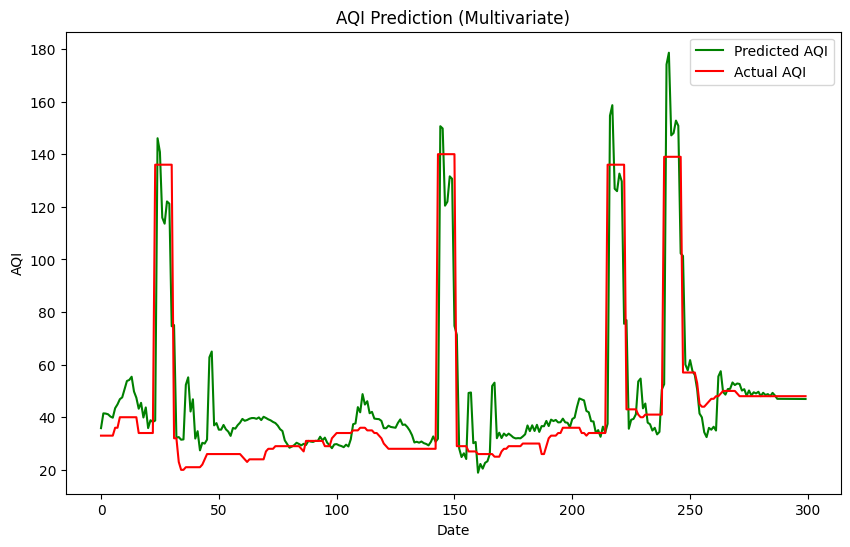

<Figure size 640x480 with 0 Axes>

In [14]:
#Plot the graph between actual vs predicted values
plt.figure(figsize=(10,6))
plt.plot(y_pred[:300,:], color= 'green',label = 'Predicted AQI')
plt.plot(y_test[:300,:] , color = 'red',label = 'Actual AQI')
plt.title("AQI Prediction (Multivariate)")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.legend()
plt.show()
plt.savefig('graph.png')